In [1]:
import os 
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
filename = os.path.join(os.getcwd(), "data", "description_extracted.csv")
df = pd.read_csv(filename, header=0, encoding='utf-8')
df.dropna(inplace=True)
df.head()

,RequisitionID,ExtractedDescription
0,00000224907,**The Boeing Company** is in search of a **L...
1,00000331804,Find your future with us.\n\nJob Description\n...
2,00000336462,Find your future with us.\n\nWe are Boeing Res...
3,00000338951,In this role you will have an opportunity to w...
4,00000339390,The stress analyst must also be able to effect...


In [3]:
nan_count = np.sum(df.isnull(), axis=0)
nan_count

RequisitionID           0
ExtractedDescription    0
dtype: int64

### Iman's Kmeans clustering code

In [4]:
# Convert job descriptions into TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=500, min_df=8)  # Adjust max_features as needed
job_description_vectors = vectorizer.fit_transform(df['ExtractedDescription'])

C:\Users\mihil\Downloads\BTTAI\Fall AI Studio\Candogram Similarity of Job Titles\bttai\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\mihil\Downloads\BTTAI\Fall AI Studio\Candogram Similarity of Job Titles\bttai\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\mihil\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mihil\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
   

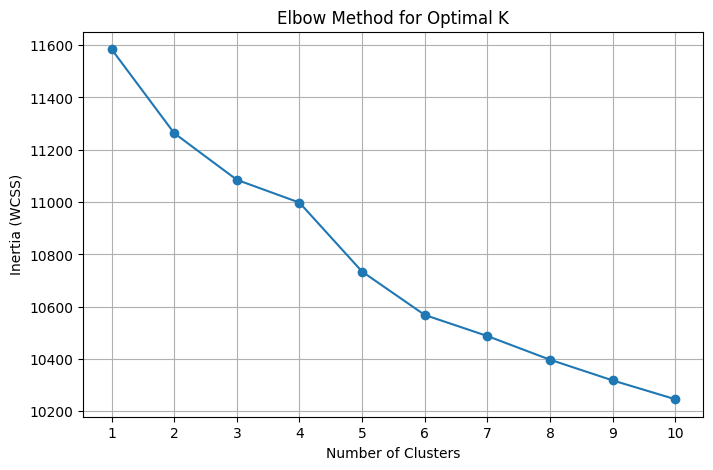

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Calculate inertia for a range of cluster numbers
inertias = []
k_values = range(1, 11)  

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(job_description_vectors)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [6]:
num_clusters = 5  # Adjust this to suit your data better
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(job_description_vectors)

# Add the cluster labels to your DataFrame
df['Cluster'] = kmeans.labels_

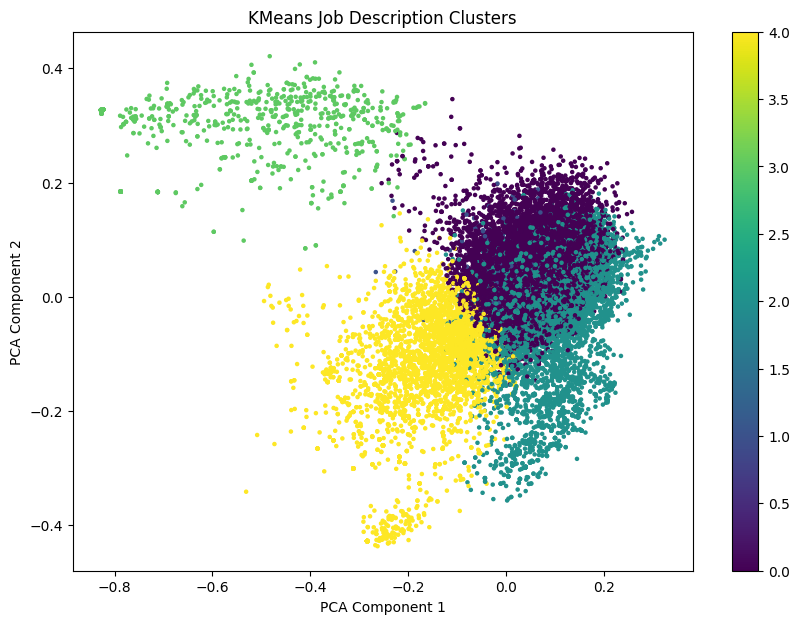

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(job_description_vectors)

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=df['Cluster'], cmap='viridis', s=5)
plt.colorbar()
plt.title("KMeans Job Description Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

### Samiul's cluster analysis

In [9]:
# Step 6: Inspect Clusters
terms = vectorizer.get_feature_names_out()
for cluster in range(num_clusters):
    cluster_indices = df[df['Cluster'] == cluster].index
    print(f"Cluster {cluster}:")
    print(df.loc[cluster_indices, 'ExtractedDescription'].head(5))  # Example descriptions in each cluster
    print()

Cluster 0:
0    **The Boeing Company**  is in search of a  **L...
2    Find your future with us.\n\nWe are Boeing Res...
3    In this role you will have an opportunity to w...
4    The stress analyst must also be able to effect...
5    Find your future with us.\n\nThe Boeing Compan...
Name: ExtractedDescription, dtype: object

Cluster 1:
81     Find your future with us.\n\nCome join an exci...
236    \n\nRequirements\n\n- Strong expertise in usin...
253    This is a Hands-On Development Position where ...
644    This role is pivotal in their data transformat...
646    Description \n\nPrincipal Duties and Responsib...
Name: ExtractedDescription, dtype: object

Cluster 2:
17     With each decade, aviation technology crossed ...
25     With each decade, aviation technology crossed ...
38     Multiple positions are needed to support 24 ho...
46     Transportation Project Engineer (PE) \n\nCateg...
118    Projects include small and mid-sized capital a...
Name: ExtractedDescription, dtype: o

In [13]:
from nltk.corpus import stopwords
from collections import Counter # Import Counter for word frequency counting

def suggest_cluster_titles(df, text_column, cluster_column, n_words=5):
    stop_words = set(stopwords.words('english'))
    cluster_titles = {}
    
    for cluster in df[cluster_column].unique():
        cluster_texts = df[df[cluster_column] == cluster][text_column]
        words = ' '.join(cluster_texts).lower().split()
        word_counts = Counter(word for word in words if word not in stop_words and len(word) > 3)
        top_words = [word for word, _ in word_counts.most_common(n_words)]
        cluster_titles[cluster] = ' '.join(top_words)
    
    return cluster_titles

# Suggest titles for each cluster
cluster_titles = suggest_cluster_titles(df, 'ExtractedDescription', 'Cluster')

# Print suggested titles
for cluster, title in cluster_titles.items():
    print(f"Cluster {cluster}: {title}")

# Add suggested titles to the dataframe
df['Suggested_Title'] = df['Cluster'].map(cluster_titles)

# Display a few examples
print(df[['Cluster', 'Suggested_Title', 'RequisitionID']].head(10))

Cluster 0: experience engineering technical work support
Cluster 4: work engineering experience support team
Cluster 2: engineering work project design experience
Cluster 1: data experience analytics like tools
Cluster 3: apple experience base design required
   Cluster                                Suggested_Title RequisitionID
0        0  experience engineering technical work support   00000224907
1        4       work engineering experience support team   00000331804
2        0  experience engineering technical work support   00000336462
3        0  experience engineering technical work support   00000338951
4        0  experience engineering technical work support   00000339390
5        0  experience engineering technical work support   00000340676
6        0  experience engineering technical work support   00000359847
7        0  experience engineering technical work support   00000361859
8        0  experience engineering technical work support   00000362125
9        0  experien

,RequisitionID,ExtractedDescription,Cluster,Suggested_Title
0,00000224907,**The Boeing Company** is in search of a **L...,0,experience engineering technical work support
1,00000331804,Find your future with us.\n\nJob Description\n...,4,work engineering experience support team
2,00000336462,Find your future with us.\n\nWe are Boeing Res...,0,experience engineering technical work support
3,00000338951,In this role you will have an opportunity to w...,0,experience engineering technical work support
4,00000339390,The stress analyst must also be able to effect...,0,experience engineering technical work support
